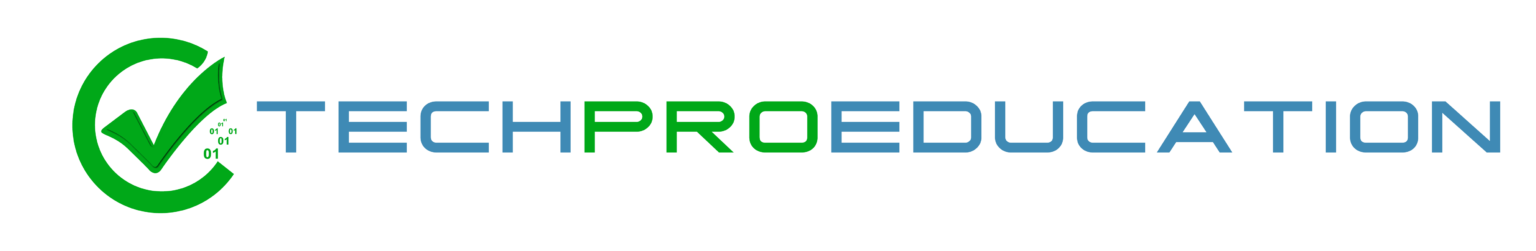

# Hand Written Digits Project

Data reference link : https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

%matplotlib inline

plt.rcParams["figure.figsize"] = (14,8)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [32]:
df = pd.read_csv("pendigits_txt.csv") 
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


# Exploratory Data Analysis and Visualization

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.000,38.814,34.258,0.000,6.000,32.000,65.000,100.000
input2,10992.000,85.120,16.219,0.000,76.000,89.000,100.000,100.000
input3,10992.000,40.606,26.343,0.000,20.000,40.000,58.000,100.000
input4,10992.000,83.774,19.164,0.000,72.000,91.000,100.000,100.000
input5,10992.000,49.770,34.101,0.000,18.000,53.000,78.000,100.000
input6,10992.000,65.573,26.997,0.000,49.000,71.000,86.000,100.000
input7,10992.000,51.220,30.577,0.000,28.000,53.500,74.000,100.000
input8,10992.000,44.499,29.906,0.000,23.000,43.000,64.000,100.000
input9,10992.000,56.869,34.136,0.000,29.000,60.000,89.000,100.000
input10,10992.000,33.696,27.252,0.000,7.000,33.000,54.000,100.000


In [35]:
df['class'].value_counts()

2    1144
4    1144
1    1143
0    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: class, dtype: int64

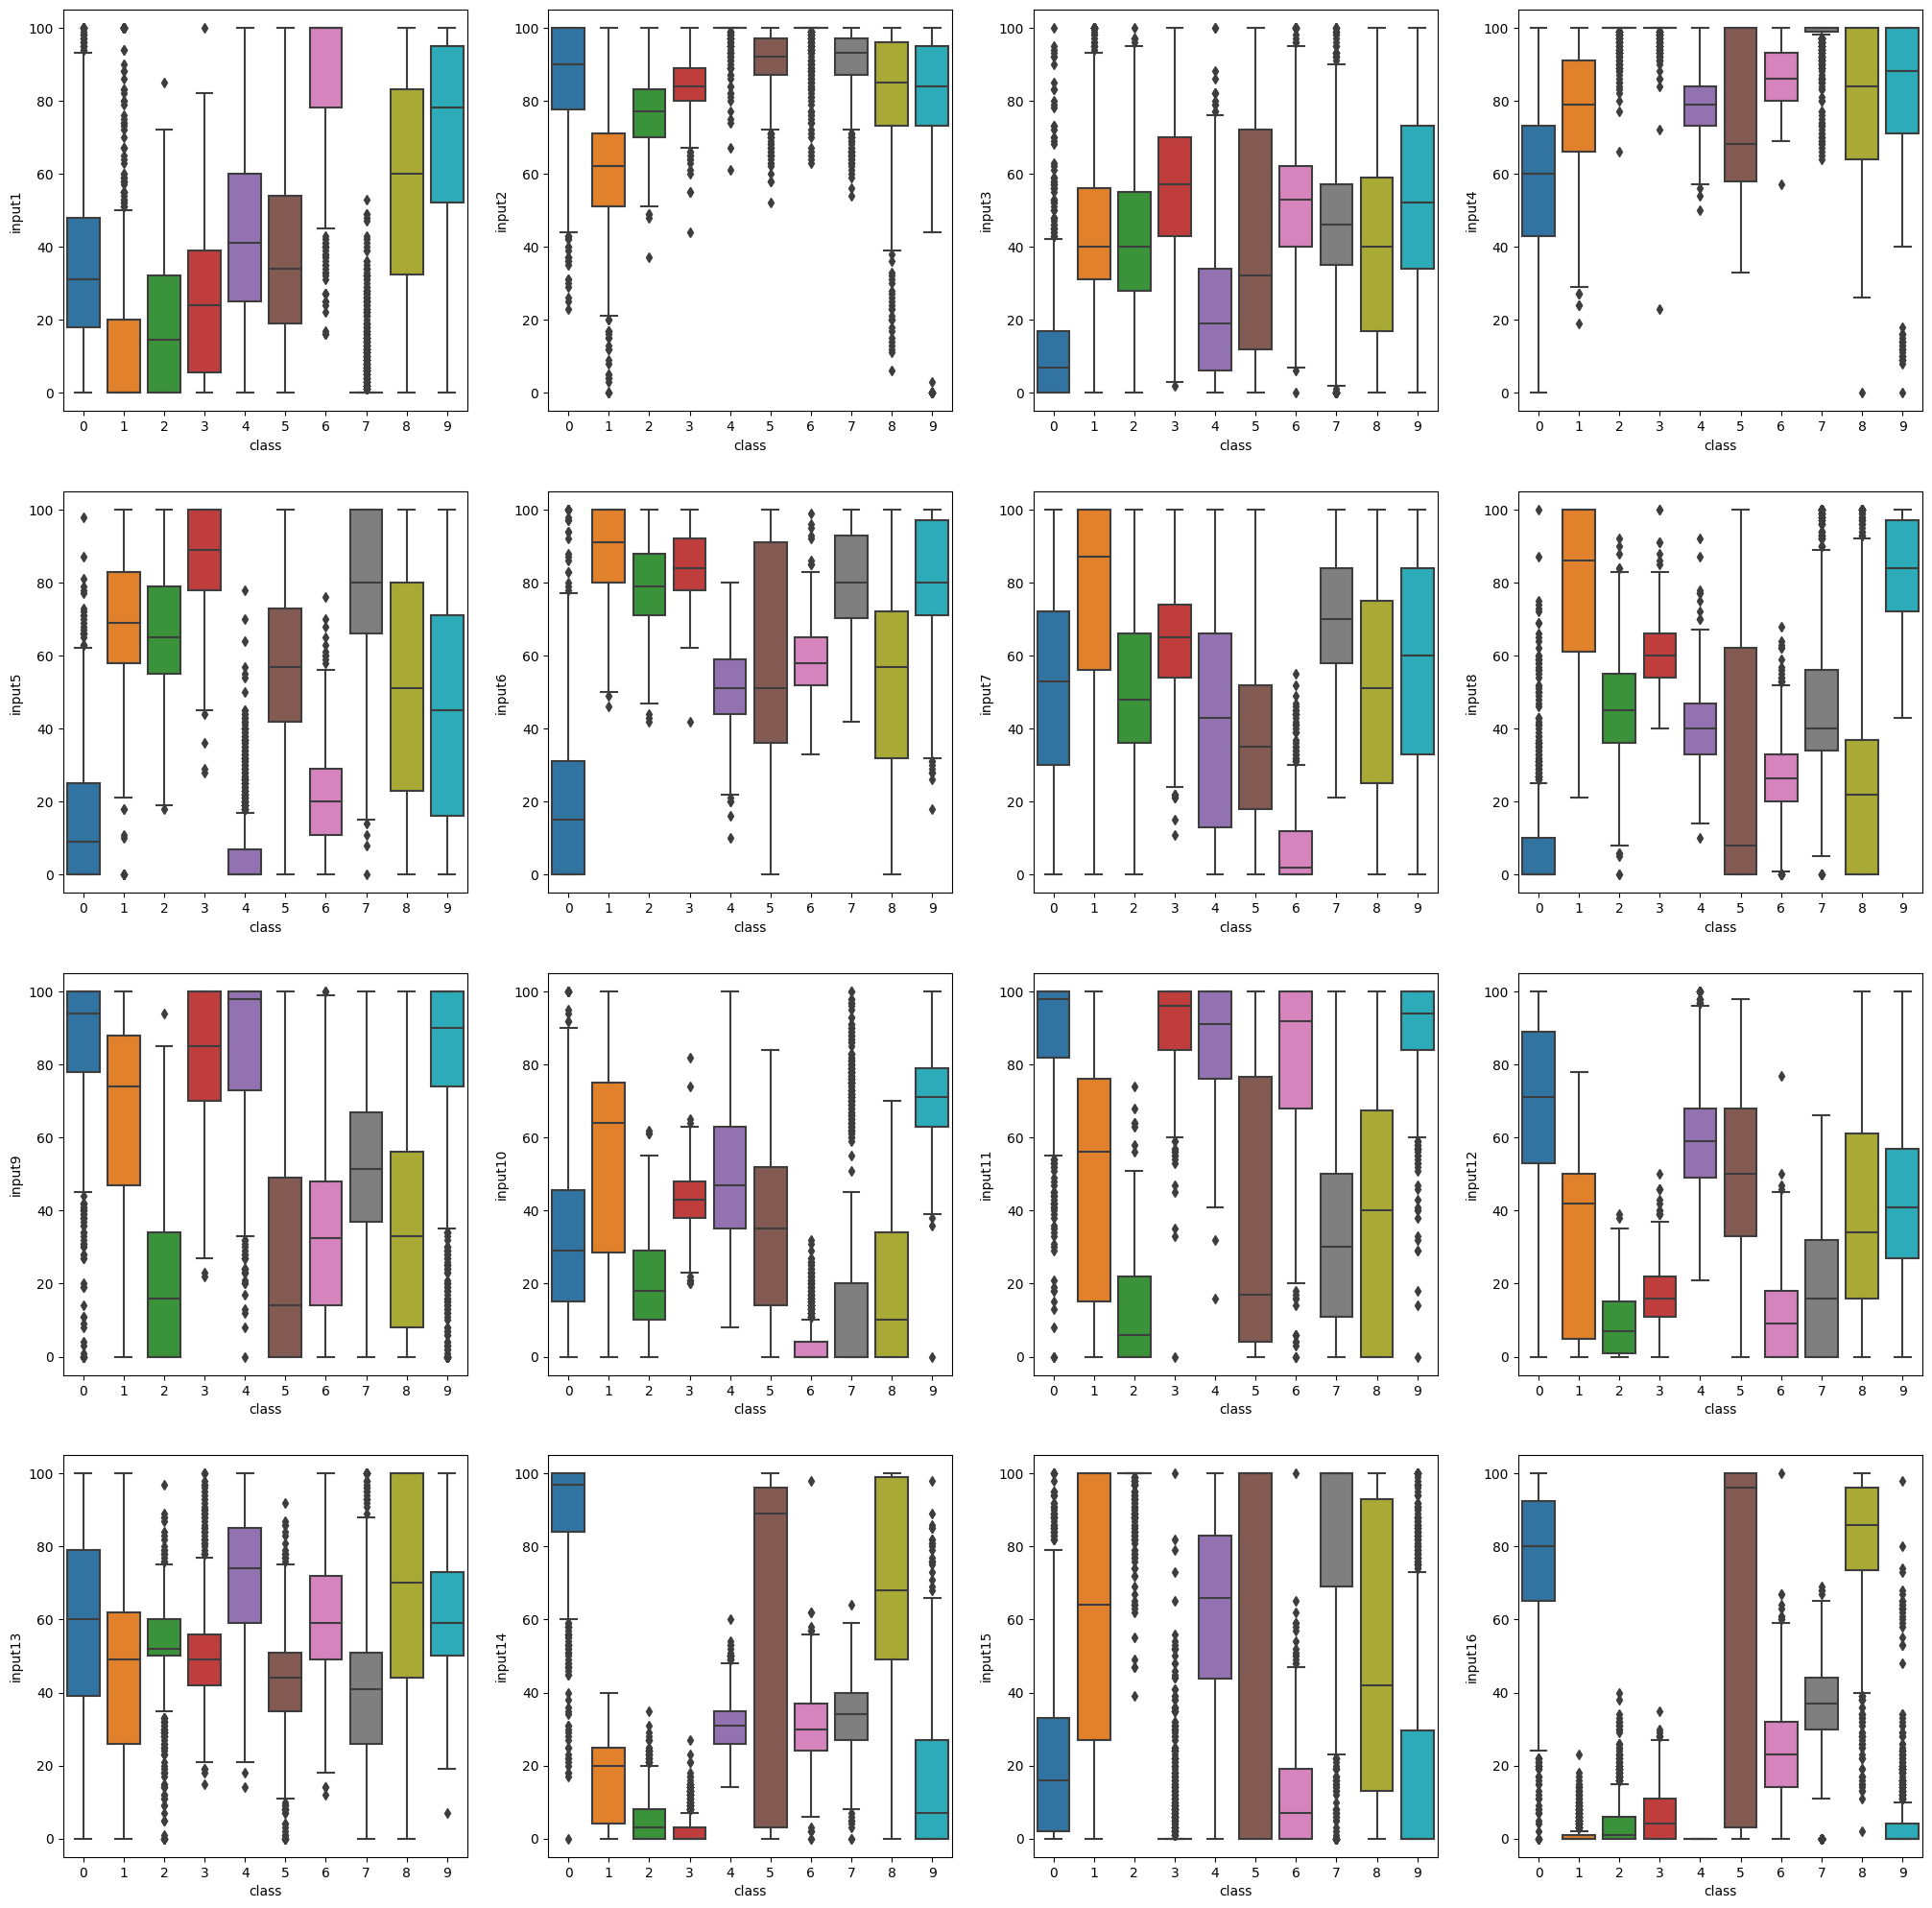

In [36]:
index = 0
plt.figure(figsize=(25,25))
for feature in df.columns:
    if feature != "class":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='class',y=feature,data=df)

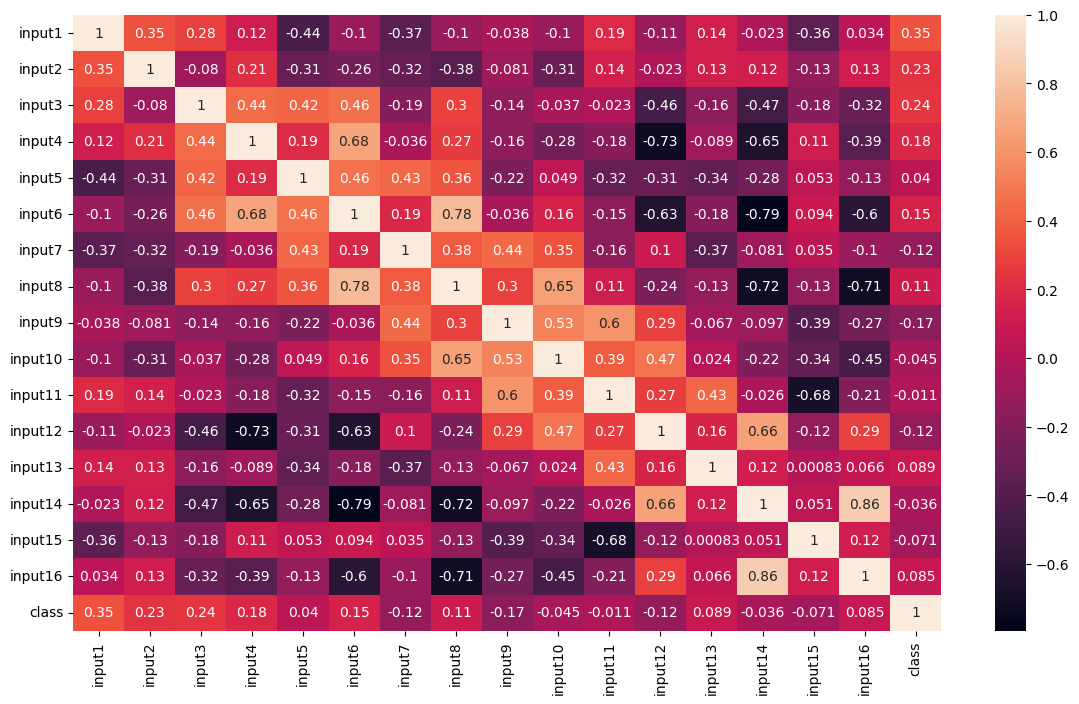

In [37]:
sns.heatmap(data=df.corr(), annot=True);

# TRAIN TEST SPLIT

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X=df.drop(["class"], axis=1)
y=df["class"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state=42)

# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101)

In [60]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [61]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[240   0   0   0   0   0   0   0   1   0]
 [  0 220   4   0   1   0   0   0   0   0]
 [  0   1 234   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   1   0   0]
 [  0   0   0   0 215   0   0   0   0   0]
 [  0   0   0   1   0 209   0   0   1   2]
 [  0   0   0   0   0   0 199   0   0   0]
 [  0   0   0   0   0   0   0 209   0   0]
 [  0   0   0   0   0   0   0   2 210   0]
 [  0   1   0   0   0   0   0   1   0 224]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       0.99      0.98      0.98       225
           2       0.98      1.00      0.99       235
           3       1.00      1.00      1.00       224
           4       1.00      1.00      1.00       215
           5       1.00      0.98      0.99       213
           6       1.00      1.00      1.00       199
           7       0.98      1.00      0.99       209
           8       0.99      0.99      0.99       212
           9       

### GRIDSEARCH

In [63]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [64]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [65]:
rf_grid_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [66]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[219   0   0   0   1   0   8   0  13   0]
 [  0 142  66   8   4   0   0   0   0   5]
 [  0   0 230   1   0   0   0   4   0   0]
 [  0   3   0 221   0   0   0   0   0   0]
 [  0   1   0   0 211   0   1   0   0   2]
 [  0   1   0  50   0 127   3   0   3  29]
 [  0   0   3   0   1   0 193   2   0   0]
 [  0  23   1   4   0   0   1 173   4   3]
 [ 16   5   0   4   0   4   1   9 172   1]
 [  3  25   0  30   9   0   0   0   0 159]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       241
           1       0.71      0.63      0.67       225
           2       0.77      0.98      0.86       235
           3       0.69      0.99      0.82       224
           4       0.93      0.98      0.96       215
           5       0.97      0.60      0.74       213
           6       0.93      0.97      0.95       199
           7       0.92      0.83      0.87       209
           8       0.90      0.81      0.85       212
           9       

# Support Vector Machine (SVM) Classifier

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
clf = OneVsRestClassifier(SVC(kernel='linear', C=1.0, random_state=42))
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', random_state=42))

In [44]:
y_pred = clf.predict(X_test)

In [49]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [54]:
eval_metric(clf, X_train, y_train, X_test, y_test)


Test_Set
[[221   4   0   0   0   0   1   0  15   0]
 [  0 195   6   2   2  17   0   1   0   2]
 [  0   4 231   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   1   0   0]
 [  0   1   1   0 212   1   0   0   0   0]
 [  0   1   0   9   0 178   3   2   3  17]
 [  0   0   0   0   0   0 196   0   3   0]
 [  0   4   0   1   1   3   1 192   3   4]
 [ 10   2   0   0   0   6   0   2 190   2]
 [  3   7   0   1   1   6   0   1   0 207]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       241
           1       0.89      0.87      0.88       225
           2       0.97      0.98      0.98       235
           3       0.94      1.00      0.97       224
           4       0.98      0.99      0.98       215
           5       0.84      0.84      0.84       213
           6       0.98      0.98      0.98       199
           7       0.96      0.92      0.94       209
           8       0.89      0.90      0.89       212
           9       